## Example using kg

In [11]:
import pathlib,sys
sys.path.append('D:\GitHub\myKG')
from kg.measurement_values import measuredValues
from kg.measurement_signal import measuredSignal
from kg.detect import *
from kg.algorithm import *
from kg.widgets import DetectControlWidget
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


setup measurement main directory 'D:\GitHub\myKG\Measurements_example\MBBMZugExample'



In [12]:
mesPath = pathlib.Path('D:\GitHub\myKG\Measurements_example\MBBMZugExample')
mesVal = measuredValues(mesPath.as_posix())
mesVal.read_variables_values()
measuredSignal.setup(mesPath.as_posix())

MIC VALUES 
-----------
Tp_e , Tp_b , TEL , Tb , LAf , Te , LAmax , LAEQ , 

IDINFO 
-----------
Temp , mDate , trainLenght , direction , axleProLenght , rain , mTime , v2 , v1 , Gleis , trainType , humidity , wind , 

Finish read values


kg.measurement_signal.measuredSignal

### Initiate micSignal Object
measurement ID, mic and 

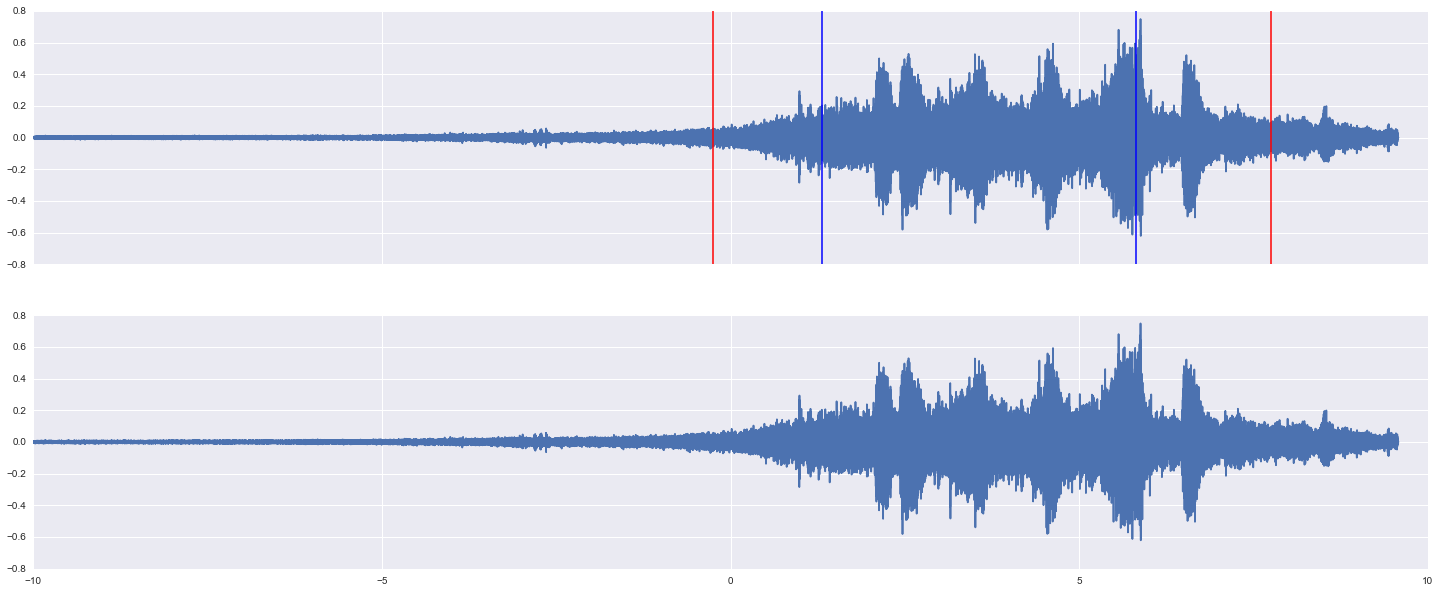

In [13]:
mID = 'm_0100'
mic = 6
mesSn = measuredSignal(mID,mic)
y, t, sR = mesSn.get_signal(mic)
values = mesVal.get_variables_values(mID, mic, [ 'Tb','Te','Tp_b','Tp_e','LAEQ', 'besch'])
micSn = MicSignal(mID, mic,y, t, sR, values)
figsize(25,10)
fig, axes = plt.subplots(2,sharex = True)
ax = axes[0]
micSn.plot_signal(ax)
micSn.plot_triggers(ax)
micSn.plot_triggers(ax,type = 'passby')
ax = axes[1]
micSn.plot_signal(ax)

### Initiate algorithm 
with parameter

In [14]:
algorithm = ZischenDetetkt1(3000,0.9,0.02)
print(repr(algorithm))

ZischenDetetkt1 :ZischenDetetkt1
description: implement the Algorithm:
        1: stft -> X(k,i),t_i
        2: calculate power per bands for every t_i
        3: build band power ratio (BPR) and compare to threshold for every t_i.parameter: {'fc': 3000, 'threshold': 0.9, 'fmin': 200, 'overlap': 2, 'dt': 0.02, 'fmax': 12000}



In [15]:
micSn.calc_kg(algorithm)

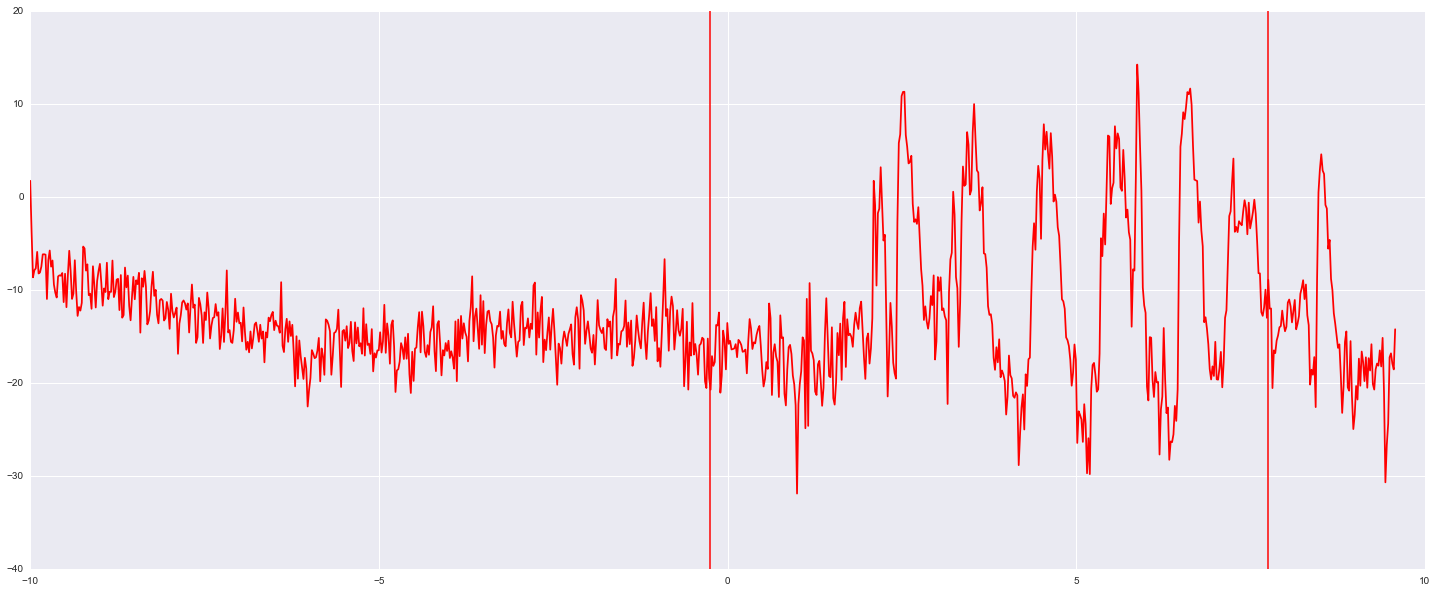

In [7]:
fig,ax =plt.subplots(1)
micSn.plot_BPR(algorithm,ax)
micSn.plot_triggers(ax)

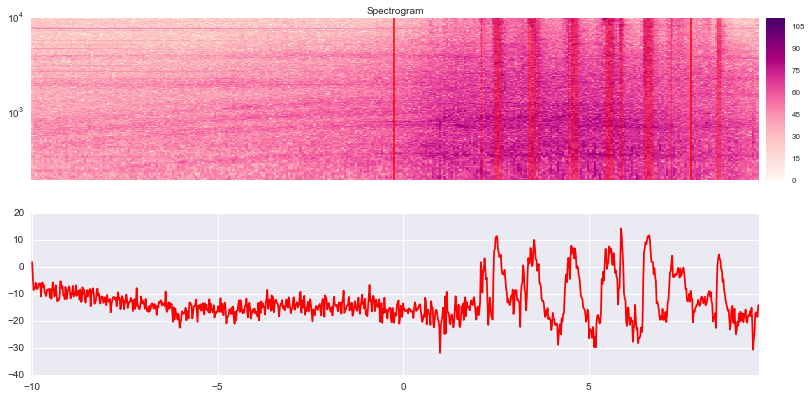

In [9]:
%gui qt
W = DetectControlWidget.alg_results(micSn,mesPath,algorithm)
W.show()